<a href="https://colab.research.google.com/github/max-dev-eng/ResearchPaperRepository/blob/main/Fig_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

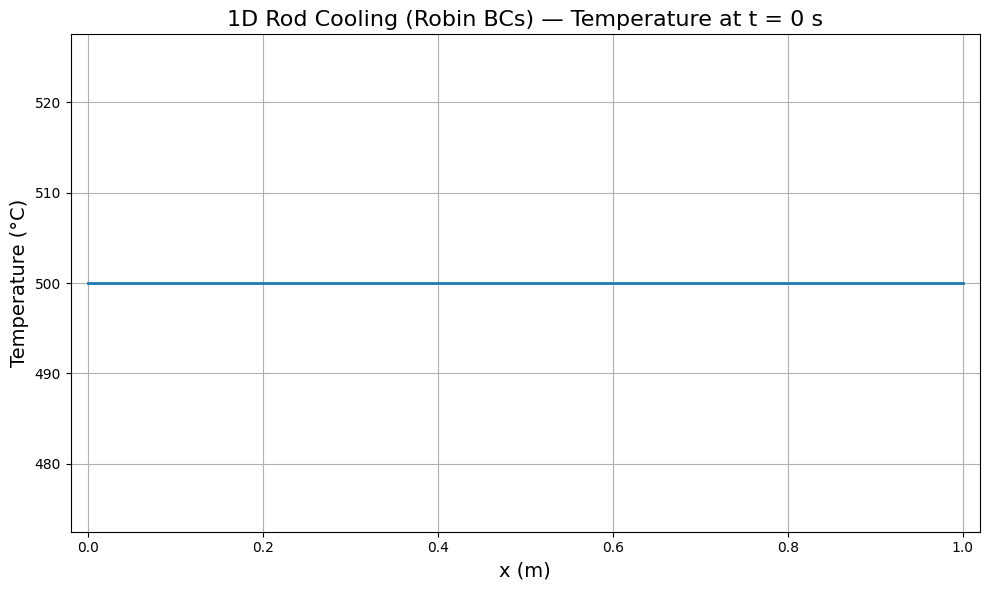

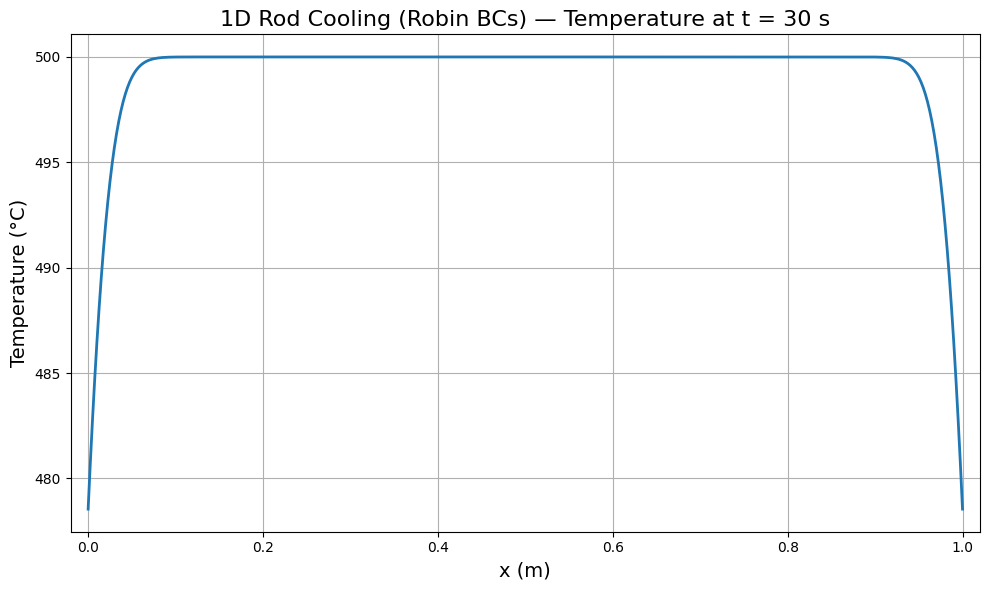

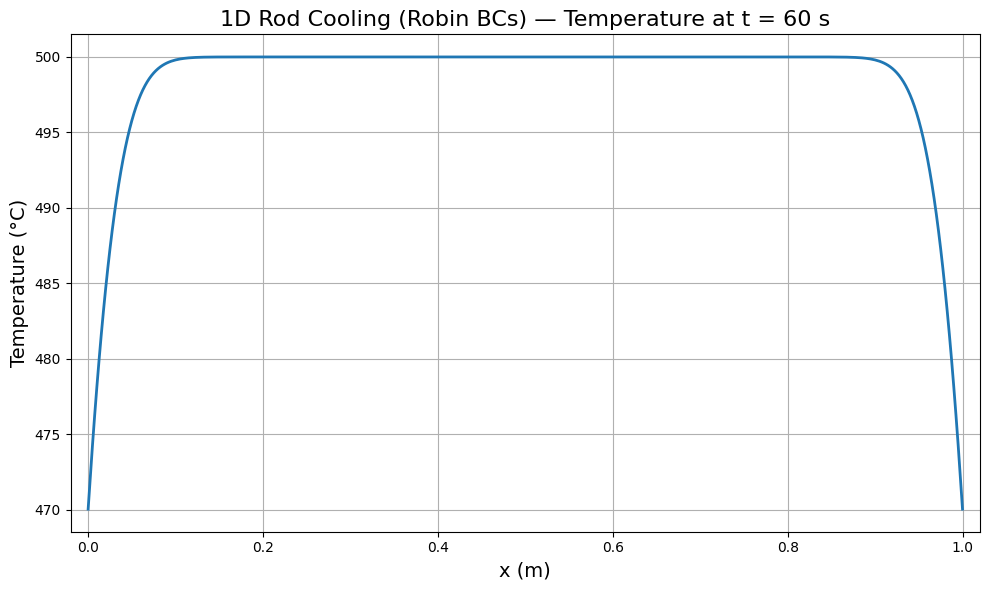

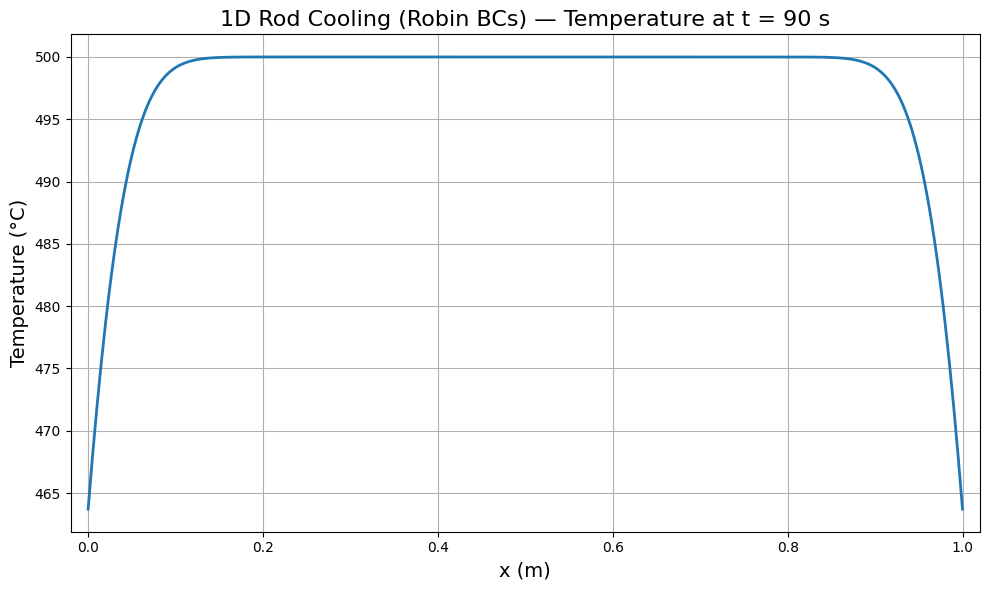

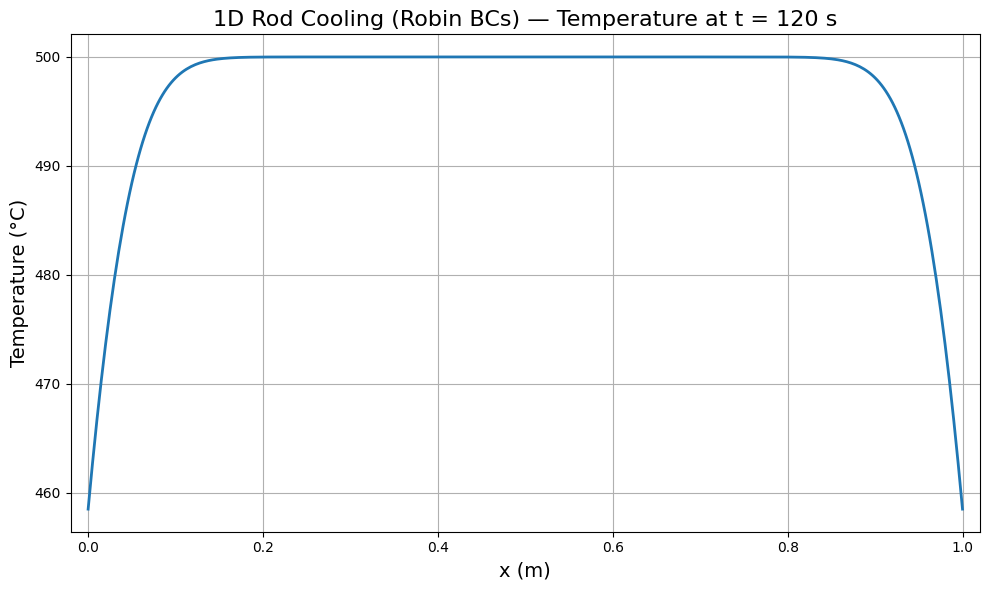

dt = 1.967213e-01 s, Nt = 610, total time = 120.000000 s
T(0) at final time = 458.506 °C, T(L) at final time = 458.506 °C (should be symmetric)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1D HEAT EQUATION (COOLING ONLY) WITH ROBIN (CONVECTIVE) BCs
# rho cp dT/dt = d/dx ( k dT/dx )
# BCs:
#   at x=0:   k * dT/dx =  h (T - T_inf)
#   at x=L:  -k * dT/dx =  h (T - T_inf)
# =========================

# ---- Geometry / grid ----
L = 1.0
Nx = 401                      # increase for smoother boundary layers
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# ---- Carbon-ceramic representative constants (kept constant for symmetry) ----
rho = 2100.0                  # kg/m^3
cp  = 1000.0                  # J/(kg·K)
k   = 30.0                    # W/(m·K)  (constant -> symmetric)
alpha = k / (rho * cp)

# ---- Convection (Robin) ----
T_inf = 23.0                  # °C ambient
h = 60.0                      # W/(m^2·K)

# ---- Initial condition (hotter than ambient) ----
T0 = 500.0                    # °C
T = np.full(Nx, T0, dtype=float)

# ---- Times to save ----
save_times = [0, 30, 60, 90, 120]  # seconds
t_end = max(save_times)

# ---- Stability (explicit FTCS): r = alpha*dt/dx^2 <= 0.5 (use safety) ----
r_target = 0.45
dt = r_target * dx**2 / alpha
Nt = int(np.ceil(t_end / dt))
dt = t_end / Nt               # adjust so we hit t_end exactly

# Map each save time to the nearest step index (avoids KeyError from float mismatch)
save_steps = {int(round(ts / dt)): ts for ts in save_times}
save_steps[0] = 0             # ensure t=0 stored

snapshots = {0: T.copy()}

# ---- Time stepping ----
for n in range(1, Nt + 1):
    Tn = T.copy()

    # Ghost nodes from Robin BCs (2nd-order central gradient)
    # Left (x=0): k*(T1 - TghostL)/(2dx) = h*(T0 - T_inf)
    TghostL = Tn[1] - (2.0 * dx * h / k) * (Tn[0] - T_inf)

    # Right (x=L): -k*(TghostR - T_{N-2})/(2dx) = h*(T_{N-1} - T_inf)
    TghostR = Tn[-2] - (2.0 * dx * h / k) * (Tn[-1] - T_inf)

    # Interior FTCS update (constant k -> standard Laplacian)
    T[1:-1] = Tn[1:-1] + alpha * dt * (Tn[2:] - 2*Tn[1:-1] + Tn[:-2]) / dx**2

    # Boundary nodes using ghost values (keeps scheme symmetric)
    T[0]  = Tn[0]  + alpha * dt * (Tn[1] - 2*Tn[0]  + TghostL) / dx**2
    T[-1] = Tn[-1] + alpha * dt * (TghostR - 2*Tn[-1] + Tn[-2]) / dx**2

    if n in save_steps:
        snapshots[save_steps[n]] = T.copy()

# ---- Plot: 4 separate graphs (no markers, centred, no clipping) ----
for ts in save_times:
    Ti = snapshots[ts]
    plt.figure(figsize=(10, 6))
    plt.plot(x, Ti, linewidth=2)  # no markers -> no dots
    plt.title(f"1D Rod Cooling (Robin BCs) — Temperature at t = {ts} s", fontsize=16)
    plt.xlabel("x (m)", fontsize=14)
    plt.ylabel("Temperature (°C)", fontsize=14)

    # Center and prevent edge clipping
    plt.xlim(-0.02, L + 0.02)
    plt.margins(x=0.02, y=0.05)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print(f"dt = {dt:.6e} s, Nt = {Nt}, total time = {Nt*dt:.6f} s")
print(f"T(0) at final time = {T[0]:.3f} °C, T(L) at final time = {T[-1]:.3f} °C (should be symmetric)")t

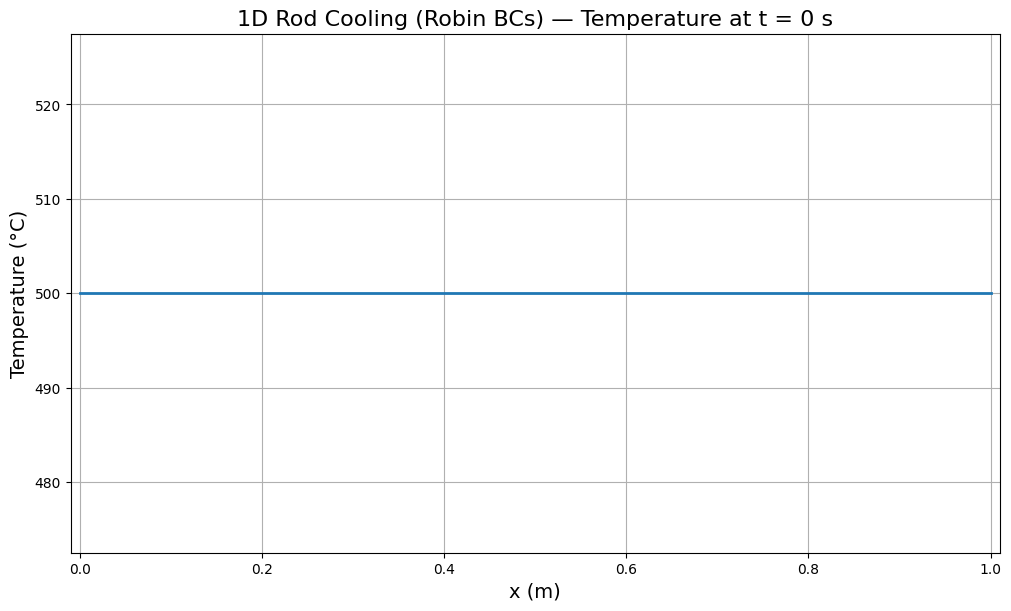

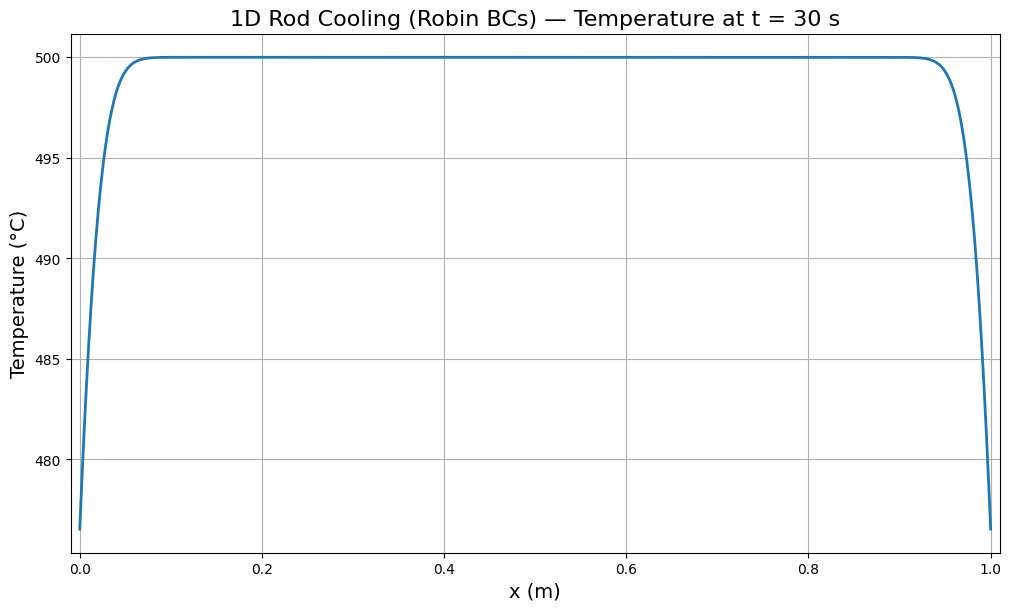

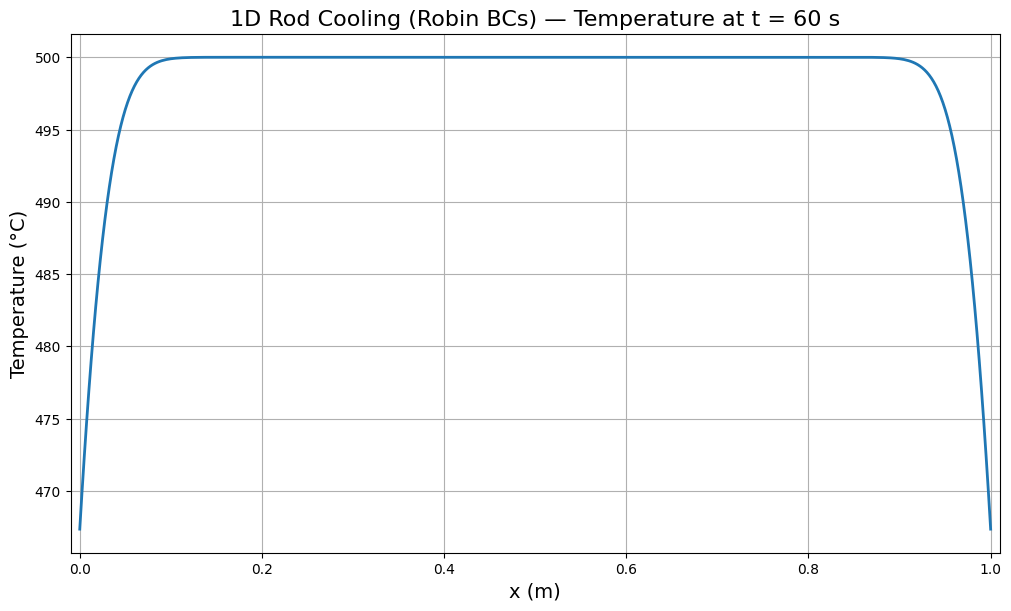

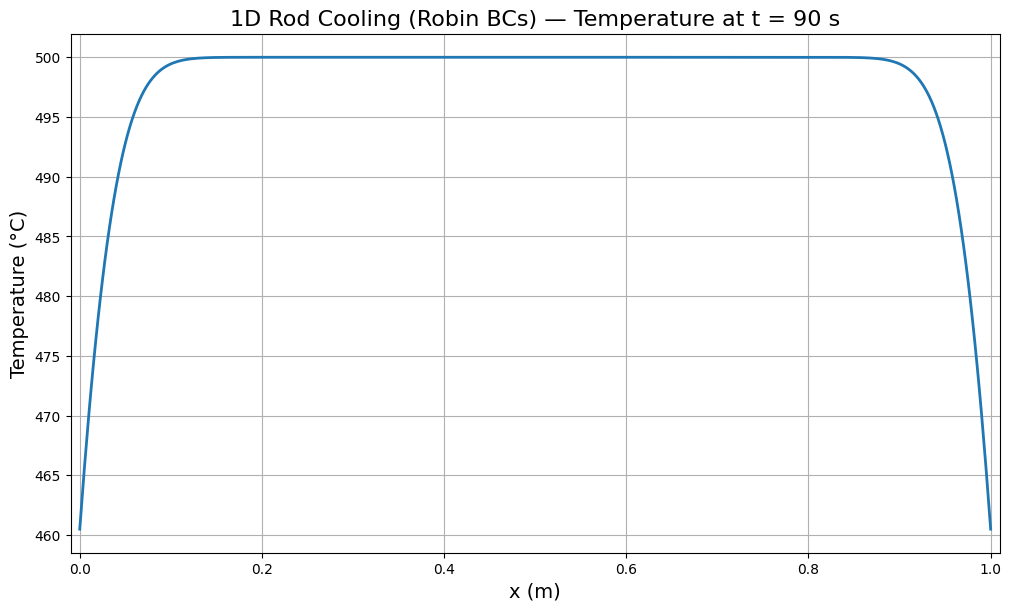

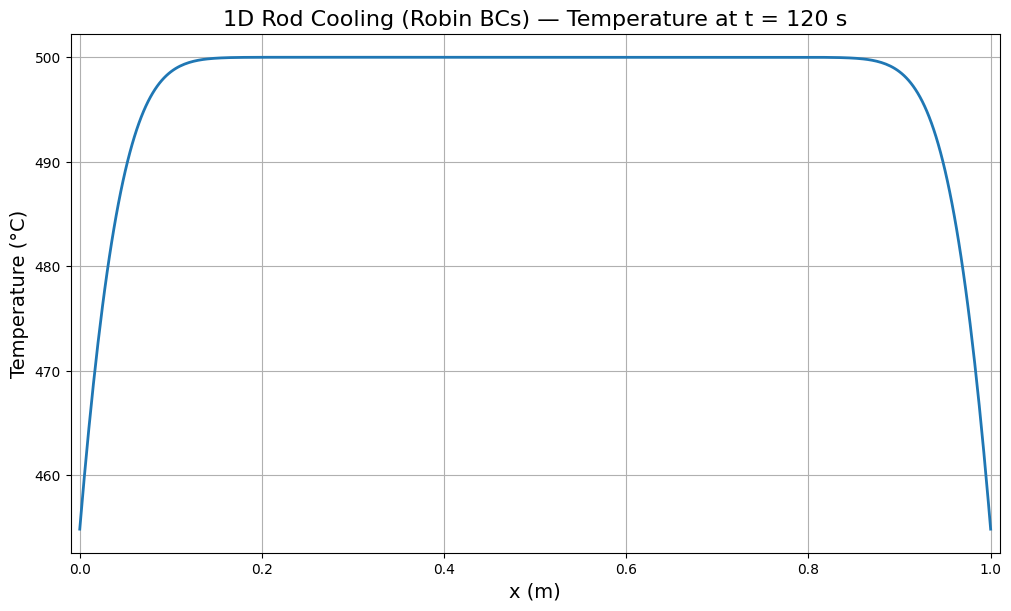

dx = 2.500000e-03 m, dt = 2.362205e-01 s, Nt = 508, r = 0.4499
Final endpoints: T(0)=454.846044 °C, T(L)=454.846044 °C, Ambient=23.00 °C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1D heat equation cooling of a rod with Robin (convective) BCs
#
# Governing equation (no internal heating):
#   rho*cp * dT/dt = d/dx( k * dT/dx )
#
# Robin BCs (Newton cooling):
#   at x=0:   k * dT/dx = h (T - T_inf)
#   at x=L:  -k * dT/dx = h (T - T_inf)
#
# Pure cooling case:
#   T(x,0) = T_init > T_inf, and qdot = 0
# ============================================================

# -----------------------
# Domain / grid
# -----------------------
L = 1.0
Nx = 401                 # increase for smooth curves (removes "dotty" appearance)
dx = L / (Nx - 1)
x = np.linspace(0.0, L, Nx)

# -----------------------
# Material (carbon-ceramic representative constants)
# (kept constant to preserve symmetry)
# -----------------------
rho = 2100.0             # kg/m^3
cp  = 1000.0             # J/(kg*K)
k   = 25.0               # W/(m*K) constant conductivity
alpha = k / (rho * cp)

# -----------------------
# Convection (Robin BC)
# -----------------------
h = 60.0                 # W/(m^2*K)
T_inf = 23.0             # °C ambient
T_init = 500.0           # °C initial rod temperature (uniform, hotter than ambient)

# -----------------------
# Time settings
# -----------------------
t_end = 120.0            # seconds
save_times = [0.0, 30.0, 60.0, 90.0, 120.0]  # requested

# Explicit FTCS stability in 1D: r = alpha*dt/dx^2 <= 0.5
dt_stable = 0.45 * dx**2 / alpha
dt = dt_stable

Nt = int(np.ceil(t_end / dt))
dt = t_end / Nt          # adjust to land exactly on t_end

# -----------------------
# Initial condition (pure cooling, uniform)
# -----------------------
T = np.full(Nx, T_init, dtype=float)

# No internal heating
qdot = np.zeros_like(T)

# -----------------------
# Helper: store snapshots by nearest step index
# -----------------------
save_steps = {int(round(ts / dt)): ts for ts in save_times}
snapshots = {}

# Store t=0 exactly
snapshots[0.0] = T.copy()

# -----------------------
# Time integration (FTCS + Robin via ghost nodes)
# -----------------------
for n in range(1, Nt + 1):
    Tn = T.copy()

    # Robin ghost nodes using central gradient:
    # at x=0:  k*(T1 - TghostL)/(2dx) = h*(T0 - T_inf)
    TghostL = Tn[1] - (2.0 * dx * h / k) * (Tn[0] - T_inf)

    # at x=L: -k*(TghostR - T_{N-2})/(2dx) = h*(T_{N-1} - T_inf)
    # => k*(TghostR - T_{N-2})/(2dx) = -h*(T_{N-1} - T_inf)
    TghostR = Tn[-2] - (2.0 * dx * h / k) * (Tn[-1] - T_inf)

    # Interior nodes (constant k simplifies diffusion operator)
    r = alpha * dt / dx**2
    T[1:-1] = Tn[1:-1] + r * (Tn[2:] - 2.0*Tn[1:-1] + Tn[:-2])

    # Boundary nodes using ghost nodes
    T[0]  = Tn[0]  + r * (Tn[1]    - 2.0*Tn[0]   + TghostL)
    T[-1] = Tn[-1] + r * (TghostR - 2.0*Tn[-1]  + Tn[-2])

    # Save snapshots at requested times (nearest step)
    if n in save_steps:
        ts = save_steps[n]
        snapshots[ts] = T.copy()

# -----------------------
# Plot: separate figures (no markers, no clipping)
# -----------------------
for ts in save_times:
    Ti = snapshots[ts]
    plt.figure(figsize=(10, 6), constrained_layout=True)
    plt.plot(x, Ti, linewidth=2, marker=None)   # marker=None removes dots
    plt.title(f"1D Rod Cooling (Robin BCs) — Temperature at t = {ts:.0f} s", fontsize=16)
    plt.xlabel("x (m)", fontsize=14)
    plt.ylabel("Temperature (°C)", fontsize=14)

    # Avoid endpoint clipping:
    plt.xlim(-0.01, L + 0.01)
    plt.margins(x=0.02)

    plt.grid(True)
    plt.show()

print(f"dx = {dx:.6e} m, dt = {dt:.6e} s, Nt = {Nt}, r = {alpha*dt/dx**2:.4f}")
print(f"Final endpoints: T(0)={T[0]:.6f} °C, T(L)={T[-1]:.6f} °C, Ambient={T_inf:.2f} °C")